In [4]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tqdm import tqdm

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

from PIL import Image
import os
from pylab import *
from PIL import Image, ImageChops, ImageEnhance

In [6]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.JPG') or f.endswith('.png') or f.endswith('.tif')]

def convert_to_ela_image(path, quality):
    filename = path
    resaved_filename = 'tempresaved.jpg'
    im = Image.open(filename)
    bm = im.convert('RGB')
    im.close()
    im=bm
    im.save(resaved_filename, 'JPEG', quality = quality)
    resaved_im = Image.open(resaved_filename)
    ela_im = ImageChops.difference(im, resaved_im)
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    im.close()
    bm.close()
    resaved_im.close()
    del filename
    del resaved_filename
    del im
    del bm
    del resaved_im
    del extrema
    del max_diff
    del scale
    return ela_im

path_original = '/content/drive/MyDrive/ColabNotebooks/Aniruddh_ML/Dataset/Train_test/real/'
path_tampered = '/content/drive/MyDrive/ColabNotebooks/Aniruddh_ML/Dataset/Train_test/fake/'

total_original = os.listdir(path_original)
total_tampered = os.listdir(path_tampered)

images = []

for file in tqdm(os.listdir(path_original)):
    try:
        if file.endswith('jpg') or file.endswith('JPG') or file.endswith('jpeg') or file.endswith('JPEG'):
            if int(os.stat(path_original + file).st_size) > 10000:
                line = path_original + file  + ',0\n'
                images.append(line)
    except:
        print(path_original+file)

for file in tqdm(os.listdir(path_tampered)):
    try:
        if file.endswith('jpg'):
            if int(os.stat(path_tampered + file).st_size) > 10000:
                    line = path_tampered + file + ',1\n'
                    images.append(line)
        if file.endswith('tif'):
            if int(os.stat(path_tampered + file).st_size) > 10000:
                    line = path_tampered + file + ',1\n'
                    images.append(line)
    except:
          print(path_tampered+file)

image_name = []
label = []
for i in tqdm(range(len(images))):
    image_name.append(images[i][0:-3])
    label.append(images[i][-2])

dataset = pd.DataFrame({'image':image_name,'class_label':label})
dataset.to_csv('dataset_CASIA2.csv',index=False)
dataset = pd.read_csv('dataset_CASIA2.csv')


FileNotFoundError: ignored

In [ ]:
dataset

,image,class_label
0,/content/drive/MyDrive/ColabNotebooks/Aniruddh...,0
1,/content/drive/MyDrive/ColabNotebooks/Aniruddh...,0
2,/content/drive/MyDrive/ColabNotebooks/Aniruddh...,0
3,/content/drive/MyDrive/ColabNotebooks/Aniruddh...,0
4,/content/drive/MyDrive/ColabNotebooks/Aniruddh...,0
...,...,...
1292,/content/drive/MyDrive/ColabNotebooks/Aniruddh...,1
1293,/content/drive/MyDrive/ColabNotebooks/Aniruddh...,1
1294,/content/drive/MyDrive/ColabNotebooks/Aniruddh...,1
1295,/content/drive/MyDrive/ColabNotebooks/Aniruddh...,1


In [ ]:
X = []
Y = []

In [ ]:
for index, row in dataset.iterrows():
    X.append(array(convert_to_ela_image(row[0], 90).resize((128, 128))).flatten() / 255.0)
    Y.append(row[1])

In [ ]:
X = np.array(X)
Y = to_categorical(Y, 2)

In [ ]:
X = X.reshape(-1, 128, 128, 3)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu', input_shape = (128,128,3)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu'))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

Input:  (None, 128, 128, 3)
Output:  (None, 124, 124, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 120, 120, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 60, 60, 32)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 124, 124, 32)      2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 120, 120, 32)      25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 60, 60, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 115200)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               29491456  
                                                      

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [ ]:
optimizer = RMSprop(lr=0.0005, rho=0.9, epsilon=1e-08, decay=0.0)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
batch_size =100
epochs = 30
history = model.fit(X_train, Y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_val,Y_val),shuffle=True)

Epoch 1/30
11/11 [==============================] - 1s 119ms/step - loss: 0.5469 - accuracy: 0.7040 - val_loss: 0.5939 - val_accuracy: 0.7077
Epoch 2/30
11/11 [==============================] - 1s 104ms/step - loss: 0.5401 - accuracy: 0.7223 - val_loss: 0.5989 - val_accuracy: 0.6769
Epoch 3/30
11/11 [==============================] - 1s 104ms/step - loss: 0.5325 - accuracy: 0.7290 - val_loss: 0.5987 - val_accuracy: 0.6654
Epoch 4/30
11/11 [==============================] - 1s 103ms/step - loss: 0.5815 - accuracy: 0.7107 - val_loss: 0.6395 - val_accuracy: 0.6192
Epoch 5/30
11/11 [==============================] - 1s 102ms/step - loss: 0.5734 - accuracy: 0.6789 - val_loss: 0.5668 - val_accuracy: 0.7000
Epoch 6/30
11/11 [==============================] - 1s 104ms/step - loss: 0.4968 - accuracy: 0.7551 - val_loss: 0.7018 - val_accuracy: 0.6577
Epoch 7/30
11/11 [==============================] - 1s 103ms/step - loss: 0.5242 - accuracy: 0.7319 - val_loss: 1.0113 - val_accuracy: 0.6192
Epoch 

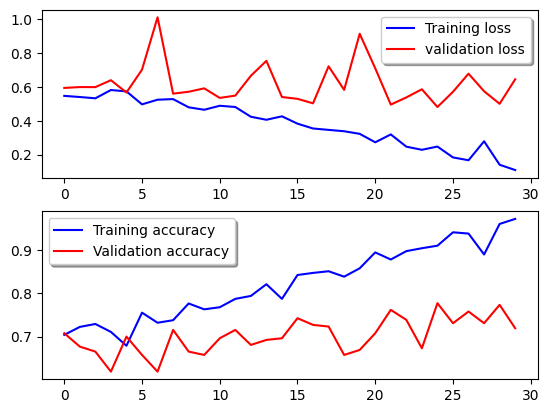

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

9/9 [==============================] - 1s 20ms/step


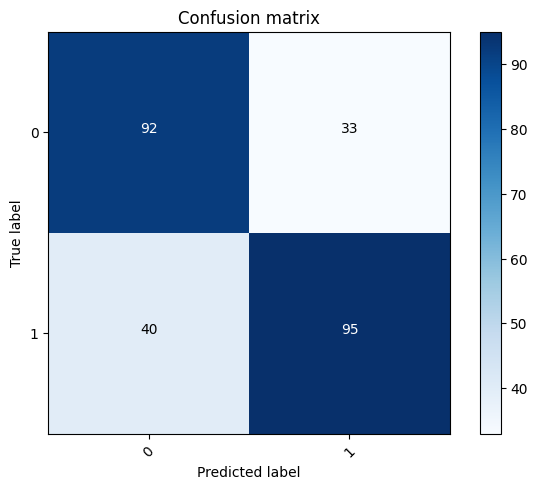

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))